In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/kc_house_data.csv')

In [3]:
grade_num = []
for index, row in df.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))
df['grade_num'] = grade_num
df.drop('grade', axis = 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,8
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,7
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,8


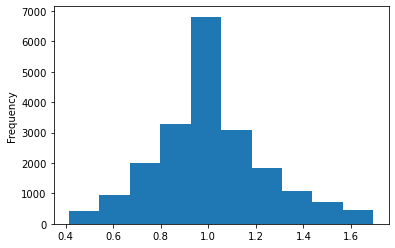

In [4]:
df.sqft_living.describe()
df['sqft_living_ratio'] = df['sqft_living'] / df['sqft_living15']
df.sqft_living_ratio.describe()


df['sqft_living_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_living_ratio'] = df['sqft_living_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])
df.sqft_living_ratio.plot.hist();

count    20386.000000
mean         1.042518
std          0.312278
min          0.054972
25%          0.933333
50%          1.000000
75%          1.077654
max          3.275862
Name: sqft_lot_ratio, dtype: float64

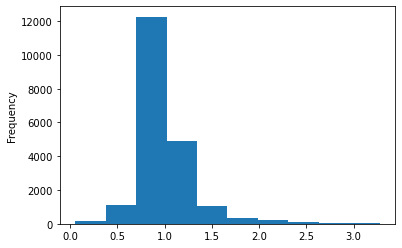

In [5]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()

df['sqft_lot_ratio'] = df.sqft_lot / df.sqft_lot15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_lot_ratio)) < 2)]
df = df.dropna(subset = ['sqft_lot_ratio'])
df.sqft_lot_ratio.plot.hist();
df.sqft_lot_ratio.describe()

In [6]:
from statsmodels.formula.api import ols
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15', 'grade_num']]
y = df.price

formula = 'price~ bedrooms + bathrooms + sqft_living_ratio + sqft_lot_ratio + C(waterfront) + floors + C(zipcode) + grade_num'
regression = ols(formula, data = df).fit().summary()

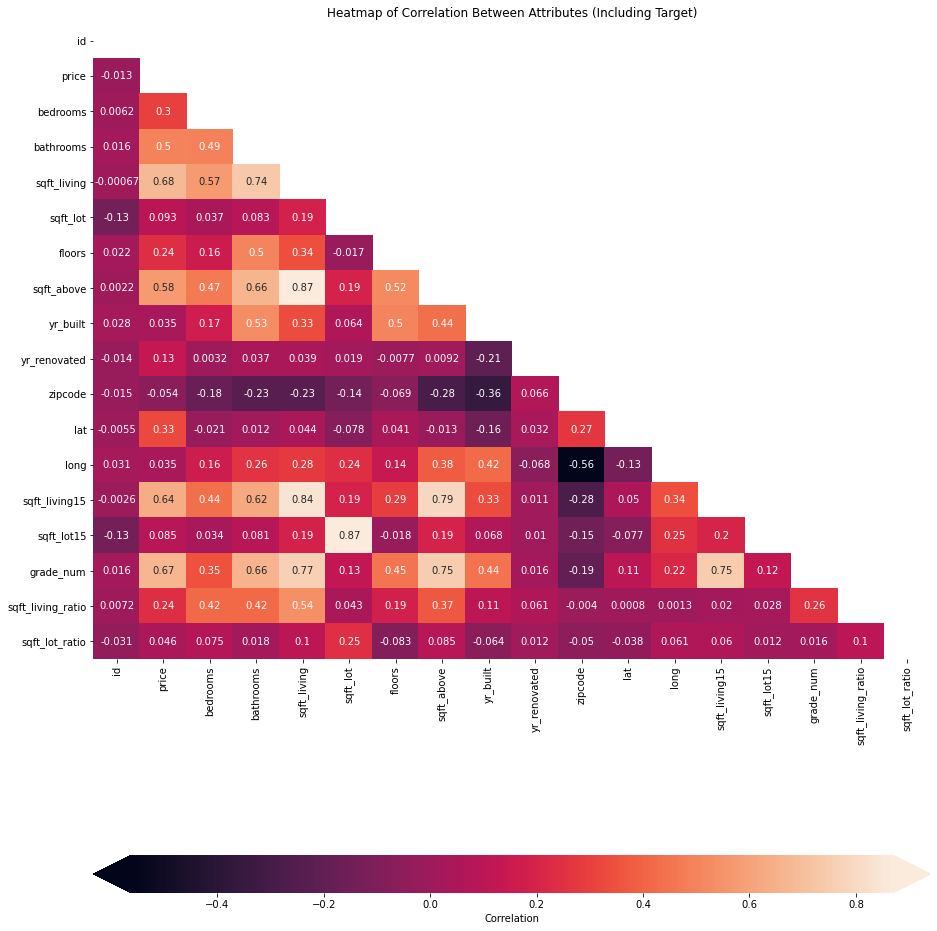

In [7]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 18))
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

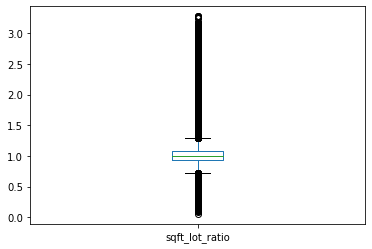

In [8]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()
df.sqft_lot_ratio.plot.box()

df['sqft_lot_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])

In [9]:
#Importing modules, tools, etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols

#importing main dataframe as df
df = pd.read_csv('data/kc_house_data.csv')

12764    13540
7245     12050
3910     10040
9245      9890
8085      9640
         ...  
11488      420
8614       410
21316      390
860        380
15367      370
Name: sqft_living, Length: 21597, dtype: int64
4980.0


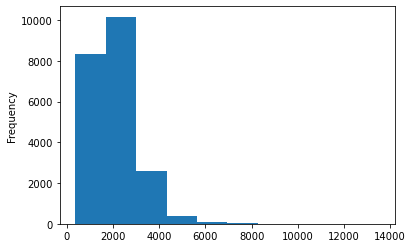

In [10]:
#Converting grade column to an int value

#Create a dummy list
grade_num = []

#Go through each row, grabbing the first index off the string, conver to int
for index, row in df.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))

#drop the old column and add the new
df['grade_num'] = grade_num
df.drop('grade', axis = 1)

# Turning NaNs in the waterfront data into NO's, then converting waterfront to binary.
# 0 is a waterfront no, 1 is a waterfront yes
#

df.waterfront.fillna(value='NO', inplace = True)
df.waterfront.replace( to_replace = ['NO','YES'], value =  [0,1], inplace = True)

print(df['sqft_living'].sort_values(ascending = False))
#Those are some big results.
print(df['sqft_living'].quantile(0.99))
# even the 99 percentile is still sub 5000. 
df['sqft_living'].plot(kind = 'hist');
#Plotting this shows a bit skew right.


#It may be wise to shave the model off around there.

<AxesSubplot:ylabel='Frequency'>

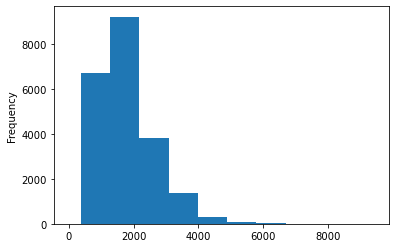

In [11]:
df['sqft_above'].sort_values(ascending = False) 
df['sqft_above'].quantile(.99)
#Not quite as extreme as sqft_livable

df['sqft_above'].plot(kind='hist');

df.sqft_living.describe()
df['sqft_living_ratio'] = df['sqft_living'] / df['sqft_living15']
df.sqft_living_ratio.describe()


df['sqft_living_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_living_ratio'] = df['sqft_living_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])
df.sqft_living_ratio.plot.hist()

count    20386.000000
mean         1.042518
std          0.312278
min          0.054972
25%          0.933333
50%          1.000000
75%          1.077654
max          3.275862
Name: sqft_lot_ratio, dtype: float64

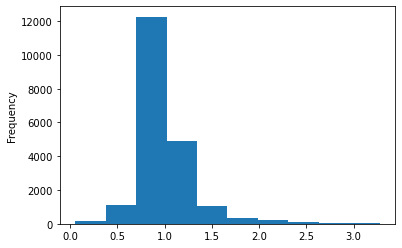

In [12]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()

df['sqft_lot_ratio'] = df.sqft_lot / df.sqft_lot15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_lot_ratio)) < 2)]
df = df.dropna(subset = ['sqft_lot_ratio'])
df.sqft_lot_ratio.plot.hist()
df.sqft_lot_ratio.describe()

In [13]:
df['floors'].value_counts()
#Seems reasonable. Maybe make it categorical?


1.0    10241
2.0     7673
1.5     1757
3.0      575
2.5      134
3.5        6
Name: floors, dtype: int64

In [14]:
# Cleaning the basement data

df['sqft_basement'] = df['sqft_basement'].replace({'?': 0.0})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [15]:
# Cleaning the view data
df['view'] = df['view'].replace({'NONE': 0, 'AVERAGE': 1, 'GOOD': 2, 'FAIR': 3, 'EXCELLENT':4})

In [16]:
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'zipcode','sqft_living15', 'sqft_lot15', 'grade_num']]

In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(df[['zipcode']])
ord_enc = OrdinalEncoder()
ord_enc.fit_transform(df[['bedrooms','bathrooms','floors','grade_num']])

array([[ 2.,  2.,  0.,  3.],
       [ 2.,  7.,  2.,  3.],
       [ 3., 10.,  0.,  3.],
       ...,
       [ 1.,  1.,  2.,  3.],
       [ 2.,  8.,  2.,  4.],
       [ 1.,  1.,  2.,  3.]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df.price)

training_data = pd.concat([X_train,y_train], axis = 1)
testing_data = pd.concat([X_test,y_test], axis = 1)

In [19]:
most_correlated_feature = 'sqft_living'

In [20]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [21]:

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())


Train score:      0.46526067677102495
Validation score: 0.4668473451463436


In [22]:
ols('y_train ~ X_train', data = training_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1724.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:18:13   Log-Likelihood:            -2.0844e+05
No. Observations:               15241   AIC:                         4.169e+05
Df Residuals:                   15227   BIC:                         4.170e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.474e+07    3.4e+06    -13.146      0.000   -5.14e+07   -3.81e+07
X_train[0]   -2.18e+04   2382.895     -9.148      0.000   -2.65e+04   -1.71e+04
X_train[1]  -1.932e+04   3918.168     -4.931      0.000    -2.7e+04   -1.16e+04
X_train[2]    164.6758     23.832      6.910      0.000     117.963     211.388
X_train[3]      0.0791      0.120      0.660      0.510      -0.156       0.314
X_train[4]  -7379.9257   4392.605     -1.680      0.093    -1.6e+04    1230.107
X_train[5]   6.077e+05   2.39e+04     25.441      0.000    5.61e+05    6.55e+05
X_train[6]   6.145e+04   3007.187     20.433      0.000    5.56e+04    6.73e+04
X_train[7]    -33.4273     23.704     -1.410      0.158     -79.889      13.035
X_train[8]     23.8154     23.560      1.011      0.312     -22.364      69.995
X_train[9]    450.9795     34.687     13.001      0.000     382.989     518.970
X_train[10]    64.8460      5.023     12.909      0.000      54.999      74.693
X_train[11]    -0.6641      0.141     -4.721      0.000      -0.940      -0.388
X_train[12]  9.709e+04   2665.801     36.420      0.000    9.19e+04    1.02e+05
==============================================================================
Omnibus:                     7368.385   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99675.965
Skew:                           1.982   Prob(JB):                         0.00
Kurtosis:                      14.885   Cond. No.                     1.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
second_model = LinearRegression()
X_train_second_model = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'zipcode','sqft_living15', 'sqft_lot15', 'grade_num']]
second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())

Second Model
Train score:      0.578074736811407
Validation score: 0.5828340085689705


In [24]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
floors: True
waterfront: True
zipcode: True
sqft_living15: True
sqft_lot15: True
grade_num: True


In [25]:
X_train_final = training_data.drop(columns = ['sqft_lot', 'view','sqft_above', 'sqft_basement'])

train_model = ols('y_train ~ bedrooms + sqft_living + floors + C(waterfront) + C(zipcode) + sqft_living15 + sqft_lot15 + grade_num', data = training_data).fit()
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     808.3
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:18:14   Log-Likelihood:            -2.0365e+05
No. Observations:               15289   AIC:                         4.074e+05
Df Residuals:                   15212   BIC:                         4.080e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.225e+05   1.46e+04    -29.007      0.000   -4.51e+05   -3.94e+05
C(waterfront)[T.1]   8.461e+05   1.56e+04     54.366      0.000    8.16e+05    8.77e+05
C(zipcode)[T.98002]  4.616e+04   1.55e+04      2.978      0.003    1.58e+04    7.65e+04
C(zipcode)[T.98003] -1.575e+04    1.4e+04     -1.128      0.259   -4.31e+04    1.16e+04
C(zipcode)[T.98004]  7.329e+05   1.39e+04     52.827      0.000    7.06e+05     7.6e+05
C(zipcode)[T.98005]   2.86e+05   1.66e+04     17.263      0.000    2.54e+05    3.18e+05
C(zipcode)[T.98006]    2.8e+05   1.22e+04     23.045      0.000    2.56e+05    3.04e+05
C(zipcode)[T.98007]  2.412e+05   1.66e+04     14.546      0.000    2.09e+05    2.74e+05
C(zipcode)[T.98008]   2.63e+05   1.38e+04     19.016      0.000    2.36e+05     2.9e+05
C(zipcode)[T.98010]  7.023e+04   2.04e+04      3.442      0.001    3.02e+04     1.1e+05
C(zipcode)[T.98011]  9.913e+04   1.53e+04      6.492      0.000    6.92e+04    1.29e+05
C(zipcode)[T.98014]  9.468e+04   1.93e+04      4.914      0.000    5.69e+04    1.32e+05
C(zipcode)[T.98019]  7.226e+04   1.57e+04      4.616      0.000    4.16e+04    1.03e+05
C(zipcode)[T.98022]  3.407e+04   1.51e+04      2.255      0.024    4454.122    6.37e+04
C(zipcode)[T.98023] -4.123e+04   1.19e+04     -3.453      0.001   -6.46e+04   -1.78e+04
C(zipcode)[T.98024]  1.397e+05   2.29e+04      6.104      0.000    9.49e+04    1.85e+05
C(zipcode)[T.98027]  1.504e+05   1.27e+04     11.855      0.000    1.26e+05    1.75e+05
C(zipcode)[T.98028]  1.049e+05   1.37e+04      7.640      0.000     7.8e+04    1.32e+05
C(zipcode)[T.98029]  1.968e+05   1.33e+04     14.770      0.000    1.71e+05    2.23e+05
C(zipcode)[T.98030] -9806.2562   1.47e+04     -0.668      0.504   -3.86e+04     1.9e+04
C(zipcode)[T.98031] -2513.6602   1.42e+04     -0.177      0.859   -3.03e+04    2.53e+04
C(zipcode)[T.98032]  5374.9200   1.83e+04      0.294      0.769   -3.05e+04    4.13e+04
C(zipcode)[T.98033]  3.514e+05   1.26e+04     27.844      0.000    3.27e+05    3.76e+05
C(zipcode)[T.98034]   1.98e+05   1.19e+04     16.598      0.000    1.75e+05    2.21e+05
C(zipcode)[T.98038]  1.817e+04   1.17e+04      1.557      0.120   -4704.823     4.1e+04
C(zipcode)[T.98039]  1.094e+06   2.82e+04     38.752      0.000    1.04e+06    1.15e+06
C(zipcode)[T.98040]  5.152e+05    1.4e+04     36.842      0.000    4.88e+05    5.43e+05
C(zipcode)[T.98042] -3922.8455   1.18e+04     -0.331      0.741   -2.71e+04    1.93e+04
C(zipcode)[T.98045]  9.956e+04   1.49e+04      6.665      0.000    7.03e+04    1.29e+05
C(zipcode)[T.98052]  2.088e+05   1.16e+04     17.980      0.000    1.86e+05    2.32e+05
C(zipcode)[T.98053]  1.817e+05   1.29e+04     14.091      0.000    1.56e+05    2.07e+05
C(zipcode)[T.98055]  4.262e+04   1.45e+04      2.941      0.003    1.42e+04     7.1e+04
C(z

In [26]:
test_model = ols('y_test ~ bedrooms + sqft_living + floors + C(waterfront) + C(zipcode) + sqft_living15 + sqft_lot15 + grade_num', data = testing_data).fit()
test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_test   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     259.2
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:18:14   Log-Likelihood:                -67895.
No. Observations:                5097   AIC:                         1.359e+05
Df Residuals:                    5020   BIC:                         1.364e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.655e+05   2.56e+04    -18.168      0.000   -5.16e+05   -4.15e+05
C(waterfront)[T.1]   6.747e+05   2.73e+04     24.701      0.000    6.21e+05    7.28e+05
C(zipcode)[T.98002]  6.705e+04   2.72e+04      2.469      0.014    1.38e+04     1.2e+05
C(zipcode)[T.98003]  6908.6187   2.34e+04      0.295      0.768    -3.9e+04    5.28e+04
C(zipcode)[T.98004]  7.185e+05   2.42e+04     29.691      0.000    6.71e+05    7.66e+05
C(zipcode)[T.98005]  2.963e+05   2.75e+04     10.766      0.000    2.42e+05     3.5e+05
C(zipcode)[T.98006]  2.694e+05   2.17e+04     12.414      0.000    2.27e+05    3.12e+05
C(zipcode)[T.98007]  2.452e+05   3.43e+04      7.141      0.000    1.78e+05    3.12e+05
C(zipcode)[T.98008]  2.556e+05   2.43e+04     10.501      0.000    2.08e+05    3.03e+05
C(zipcode)[T.98010]  1.002e+05   3.43e+04      2.922      0.003     3.3e+04    1.67e+05
C(zipcode)[T.98011]  1.164e+05    2.8e+04      4.162      0.000    6.16e+04    1.71e+05
C(zipcode)[T.98014]  9.622e+04   3.21e+04      3.002      0.003    3.34e+04    1.59e+05
C(zipcode)[T.98019]  6.927e+04   2.76e+04      2.508      0.012    1.51e+04    1.23e+05
C(zipcode)[T.98022]  2.591e+04   2.55e+04      1.014      0.310   -2.42e+04     7.6e+04
C(zipcode)[T.98023] -4.714e+04   2.11e+04     -2.233      0.026   -8.85e+04   -5761.261
C(zipcode)[T.98024]  1.351e+05   4.55e+04      2.971      0.003     4.6e+04    2.24e+05
C(zipcode)[T.98027]  1.603e+05   2.18e+04      7.360      0.000    1.18e+05    2.03e+05
C(zipcode)[T.98028]  1.303e+05    2.5e+04      5.218      0.000    8.13e+04    1.79e+05
C(zipcode)[T.98029]  2.045e+05   2.35e+04      8.705      0.000    1.58e+05    2.51e+05
C(zipcode)[T.98030]  1.175e+04   2.31e+04      0.508      0.611   -3.36e+04    5.71e+04
C(zipcode)[T.98031]  2.877e+04   2.34e+04      1.228      0.220   -1.72e+04    7.47e+04
C(zipcode)[T.98032]  3.021e+04   3.04e+04      0.993      0.321   -2.94e+04    8.99e+04
C(zipcode)[T.98033]  3.496e+05   2.17e+04     16.113      0.000    3.07e+05    3.92e+05
C(zipcode)[T.98034]  2.032e+05   1.99e+04     10.210      0.000    1.64e+05    2.42e+05
C(zipcode)[T.98038]  1.921e+04   2.02e+04      0.950      0.342   -2.04e+04    5.89e+04
C(zipcode)[T.98039]  1.228e+06   4.79e+04     25.654      0.000    1.13e+06    1.32e+06
C(zipcode)[T.98040]  5.302e+05   2.53e+04     20.992      0.000    4.81e+05     5.8e+05
C(zipcode)[T.98042]  1.515e+04   2.06e+04      0.736      0.462   -2.52e+04    5.55e+04
C(zipcode)[T.98045]  1.188e+05   2.82e+04      4.214      0.000    6.35e+04    1.74e+05
C(zipcode)[T.98052]  2.162e+05    2.1e+04     10.271      0.000    1.75e+05    2.57e+05
C(zipcode)[T.98053]  1.811e+05   2.15e+04      8.429      0.000    1.39e+05    2.23e+05
C(zipcode)[T.98055]  5.737e+04   2.32e+04      2.474      0.013    1.19e+04    1.03e+05
C(z

In [27]:
from statsmodels.tools.eval_measures import rmse

ypred_train = train_model.predict(X_train)
ypred_test = test_model.predict(X_test)

train_rmse = rmse(y_train,ypred_train)
test_rmse = rmse(y_test,ypred_test)

print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Root Mean Squarred Error: 147408.3926475166
Test Root Mean Squarred Error: 147522.77769105718


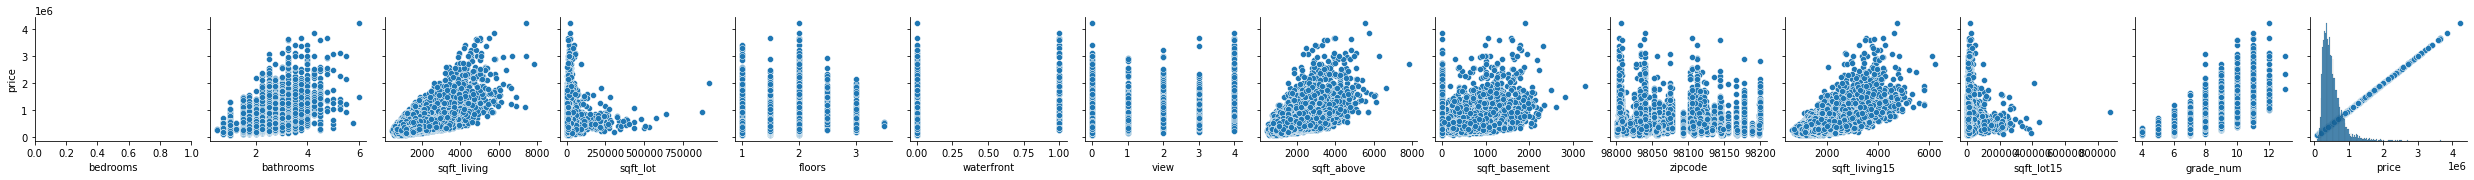

In [28]:
sns.pairplot(training_data, y_vars = 'price')

In [29]:
test_model = ols('y_test ~ bedrooms + sqft_living + floors + C(waterfront) + C(zipcode) + sqft_living15 + sqft_lot15 + grade_num', data = testing_data).fit()
test_model.summary()
params = []
for i in range(len(test_model.params)):
    params.append((test_model.params.index[i],test_model.params[i]))
params.sort(key=lambda x: x[1])
params[:5]

[('Intercept', -465542.38136205444),
 ('C(zipcode)[T.98023]', -47137.54423614431),
 ('floors', -37572.250055090284),
 ('C(zipcode)[T.98092]', -30152.29443983092),
 ('bedrooms', -22091.9603215861)]

In [30]:
from statsmodels.tools.eval_measures import rmse

ypred_train = train_model.predict(X_train)
ypred_test = test_model.predict(X_test)

train_rmse = rmse(y_train,ypred_train)
test_rmse = rmse(y_test,ypred_test)

print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Root Mean Squarred Error: 147408.3926475166
Test Root Mean Squarred Error: 147522.77769105718


In [31]:
Seattle_zipcodes = [98101, 98102, 98103, 98104, 98105, 
                    98106, 98107, 98108, 98109, 98112, 
                    98115, 98116, 98117, 98118, 98119, 
                    98121, 98122, 98125, 98126, 98133, 
                    98134, 98136, 98144, 98146, 98154, 
                    98164, 98174, 98177, 98178, 98195, 
                    98199 ]

Suburb_zipcodes =  [98155, 98028, 98034, 98033, 98011, 
                    98039, 98052, 98168, 98166, 98148,
                    98055, 98057, 98056, 98198, 98040, 
                    98004, 98031, 98032, 98006, 98005]

df['in_Seattle'] = np.where(df['zipcode'].isin(Seattle_zipcodes),1,0)

df['Location'] = np.where(df['zipcode'].isin(Seattle_zipcodes),'In Seattle', 
                          np.where(df['zipcode'].isin(Suburb_zipcodes),'Suburban','Rural'))

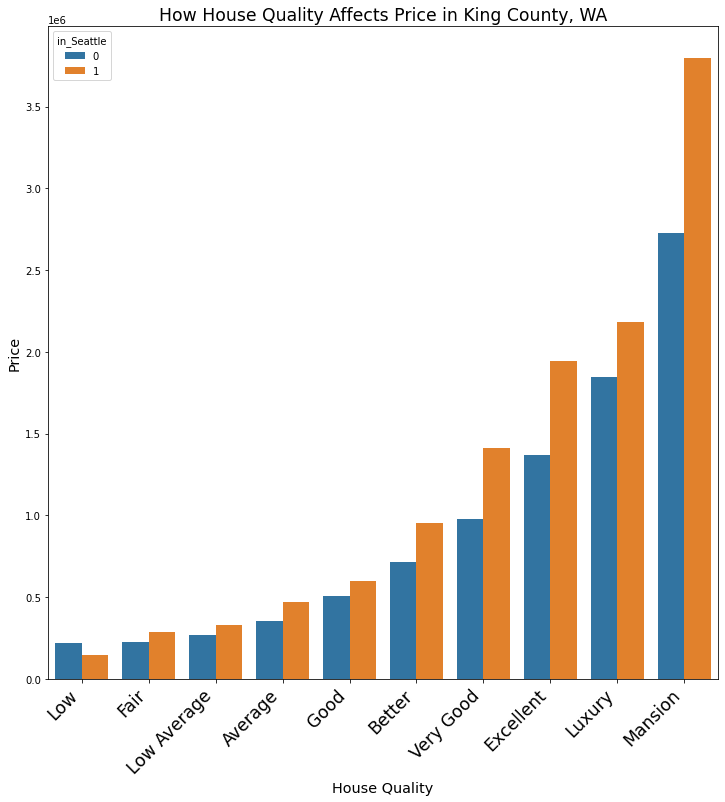

In [32]:
fig, ax = plt.subplots(figsize = (12,12))
ax = sns.barplot(data = df, x = 'grade_num', y= 'price', hue = 'in_Seattle', ci = 0)
ax.set_title('How House Quality Affects Price in King County, WA', fontsize = 'xx-large')
ax.set_xlabel('House Quality', fontsize = 'x-large')
ax.set_ylabel('Price', fontsize = 'x-large')
ax.set_xticklabels(['Low','Fair','Low Average', 'Average', 'Good', 'Better', 'Very Good','Excellent', 'Luxury', 'Mansion'],
                  rotation = 45, horizontalalignment = 'right', fontsize = 'xx-large');

In [33]:
df.groupby(['zipcode','in_Seattle']).mean().sort_values('price', ascending = False).head(50)

,,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,grade_num,sqft_living_ratio,sqft_lot_ratio
zipcode,in_Seattle,,,,,,,,,,,,,,,,,,,,
98039,0,3.510088e+09,1.823214e+06,3.952381,2.803571,3248.214286,16353.238095,1.500000,0.023810,0.547619,2897.738095,350.476190,1967.476190,527.529412,47.625629,-122.233452,3144.523810,16784.952381,9.166667,1.034102,0.973846
98004,0,4.459302e+09,1.258273e+06,3.767025,2.370072,2703.046595,13112.275986,1.372760,0.000000,0.348921,2226.738351,476.308244,1968.311828,209.576419,47.616109,-122.205376,2712.903226,12890.856631,8.505376,0.988434,1.019125
98040,0,4.198967e+09,1.151804e+06,3.973881,2.648321,3012.078358,13490.242537,1.485075,0.033582,0.710526,2400.302239,601.925373,1970.369403,244.087336,47.559525,-122.225896,2913.865672,12823.541045,8.902985,1.028241,1.060835
98112,1,4.745976e+09,1.081133e+06,3.427419,2.324597,2400.391129,4947.645161,1.784274,0.000000,0.101215,1929.463710,463.145161,1943.104839,201.889423,47.629752,-122.297843,2309.116935,4931.685484,8.387097,1.042589,0.988243
98006,0,4.662507e+09,8.531651e+05,3.828512,2.536157,2848.535124,12868.861570,1.454545,0.008264,0.492754,2267.956612,571.776860,1978.741736,70.117500,47.557991,-122.146678,2785.444215,12056.731405,8.795455,1.018622,1.063379
98105,1,5.285833e+09,8.485439e+05,3.520930,2.102326,2072.800000,5096.600000,1.572093,0.013953,0.306977,1631.776744,436.744186,1938.962791,159.000000,47.664981,-122.294214,2041.930233,4954.027907,7.786047,1.011261,1.017461
98109,1,3.474819e+09,8.380243e+05,3.117647,2.100490,1941.970588,3505.725490,1.715686,0.000000,0.284314,1560.892157,359.411765,1944.205882,144.963855,47.635408,-122.349833,1931.372549,3602.764706,7.941176,1.007032,0.973235
98102,1,4.024435e+09,8.095781e+05,3.072917,2.177083,1941.135417,3270.583333,1.984375,0.000000,0.093750,1608.687500,317.031250,1955.510417,84.183099,47.634656,-122.322260,1951.406250,3222.416667,8.239583,0.974547,1.032260
98119,1,4.290195e+09,8.032941e+05,3.127273,2.124242,1871.533333,3492.230303,1.775758,0.000000,0.436364,1504.563636,346.606061,1947.593939,148.686567,47.640429,-122.367042,1866.969697,3683.424242,7.933333,1.003016,0.958388
